In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\cleaned_data.csv")

In [5]:
df.head()

,open,high,low,close,volume,rsi_7,cci_7,sma_100,ema_100,macd,bollinger,atr_7,next_day_close,Date,target
0,314,315,313,315,7860650,100,-66,314,314,0,314,4,281,20150102,0
1,314,315,281,281,33054400,1,-100,303,303,-1,303,15,264,20150103,0
2,281,287,257,264,55629100,1,-110,293,293,-2,293,20,274,20150104,1
3,265,278,265,274,43962800,21,-76,289,289,-2,289,18,286,20150105,1
4,274,287,272,286,23245700,38,-37,289,288,-1,289,17,294,20150106,1


In [6]:
df.isnull().sum()

open              0
high              0
low               0
close             0
volume            0
rsi_7             0
cci_7             0
sma_100           0
ema_100           0
macd              0
bollinger         0
atr_7             0
next_day_close    0
Date              0
target            0
dtype: int64

In [7]:
# Define features and target variable
X = df[['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'cci_7', 'sma_100', 'ema_100', 'macd', 'bollinger', 'atr_7']]
y = df['target']


In [8]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46       313
           1       0.53      0.50      0.51       369

    accuracy                           0.49       682
   macro avg       0.49      0.49      0.49       682
weighted avg       0.49      0.49      0.49       682



In [13]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix_result}')

Confusion Matrix:
[[147 166]
 [184 185]]


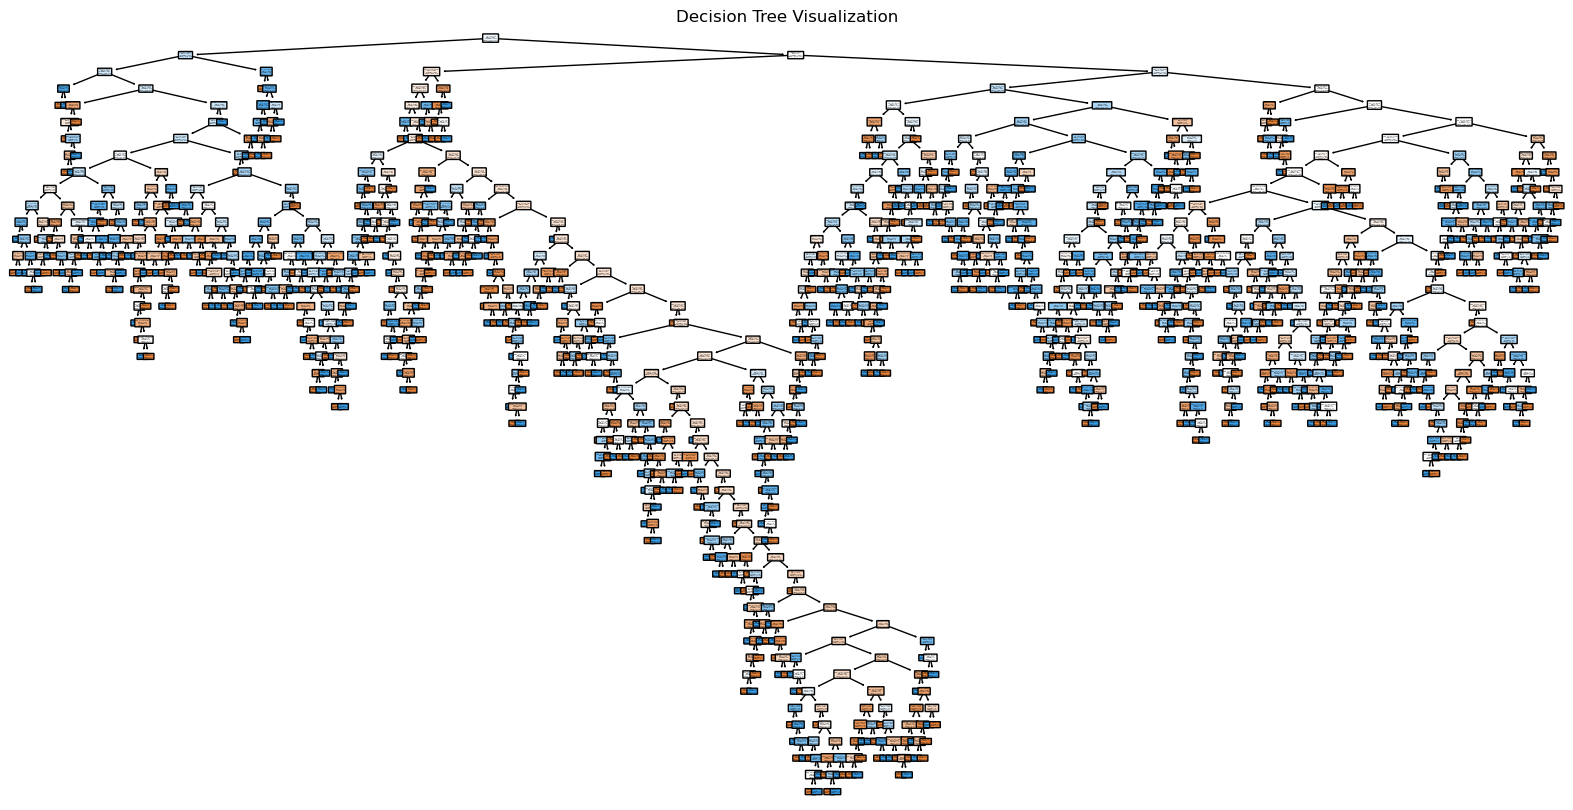

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'cci_7', 'sma_100', 'ema_100', 'macd', 'bollinger', 'atr_7'], class_names=['0', '1'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

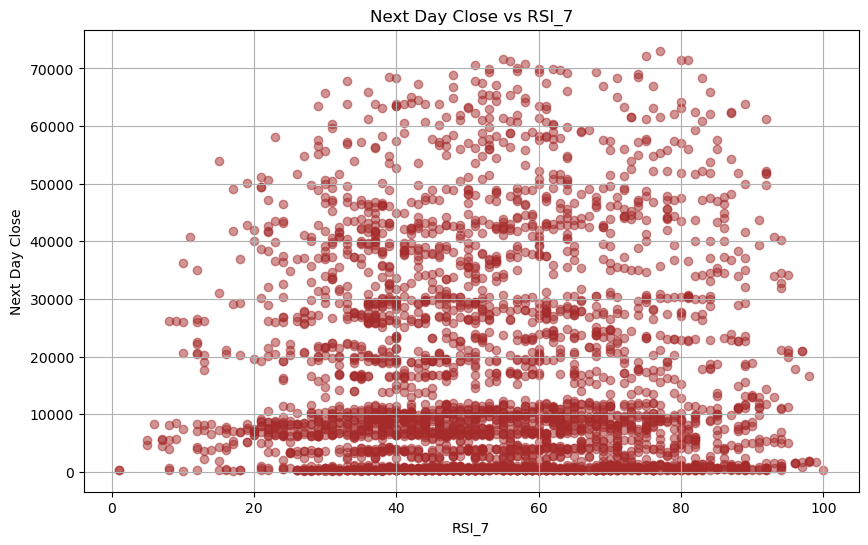

In [22]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Plotting next_day_close against RSI_7
plt.figure(figsize=(10, 6))
plt.scatter(df['rsi_7'], df['next_day_close'], alpha=0.5, color='brown')
plt.title('Next Day Close vs RSI_7')
plt.xlabel('RSI_7')
plt.ylabel('Next Day Close')
plt.grid(True)
plt.show()


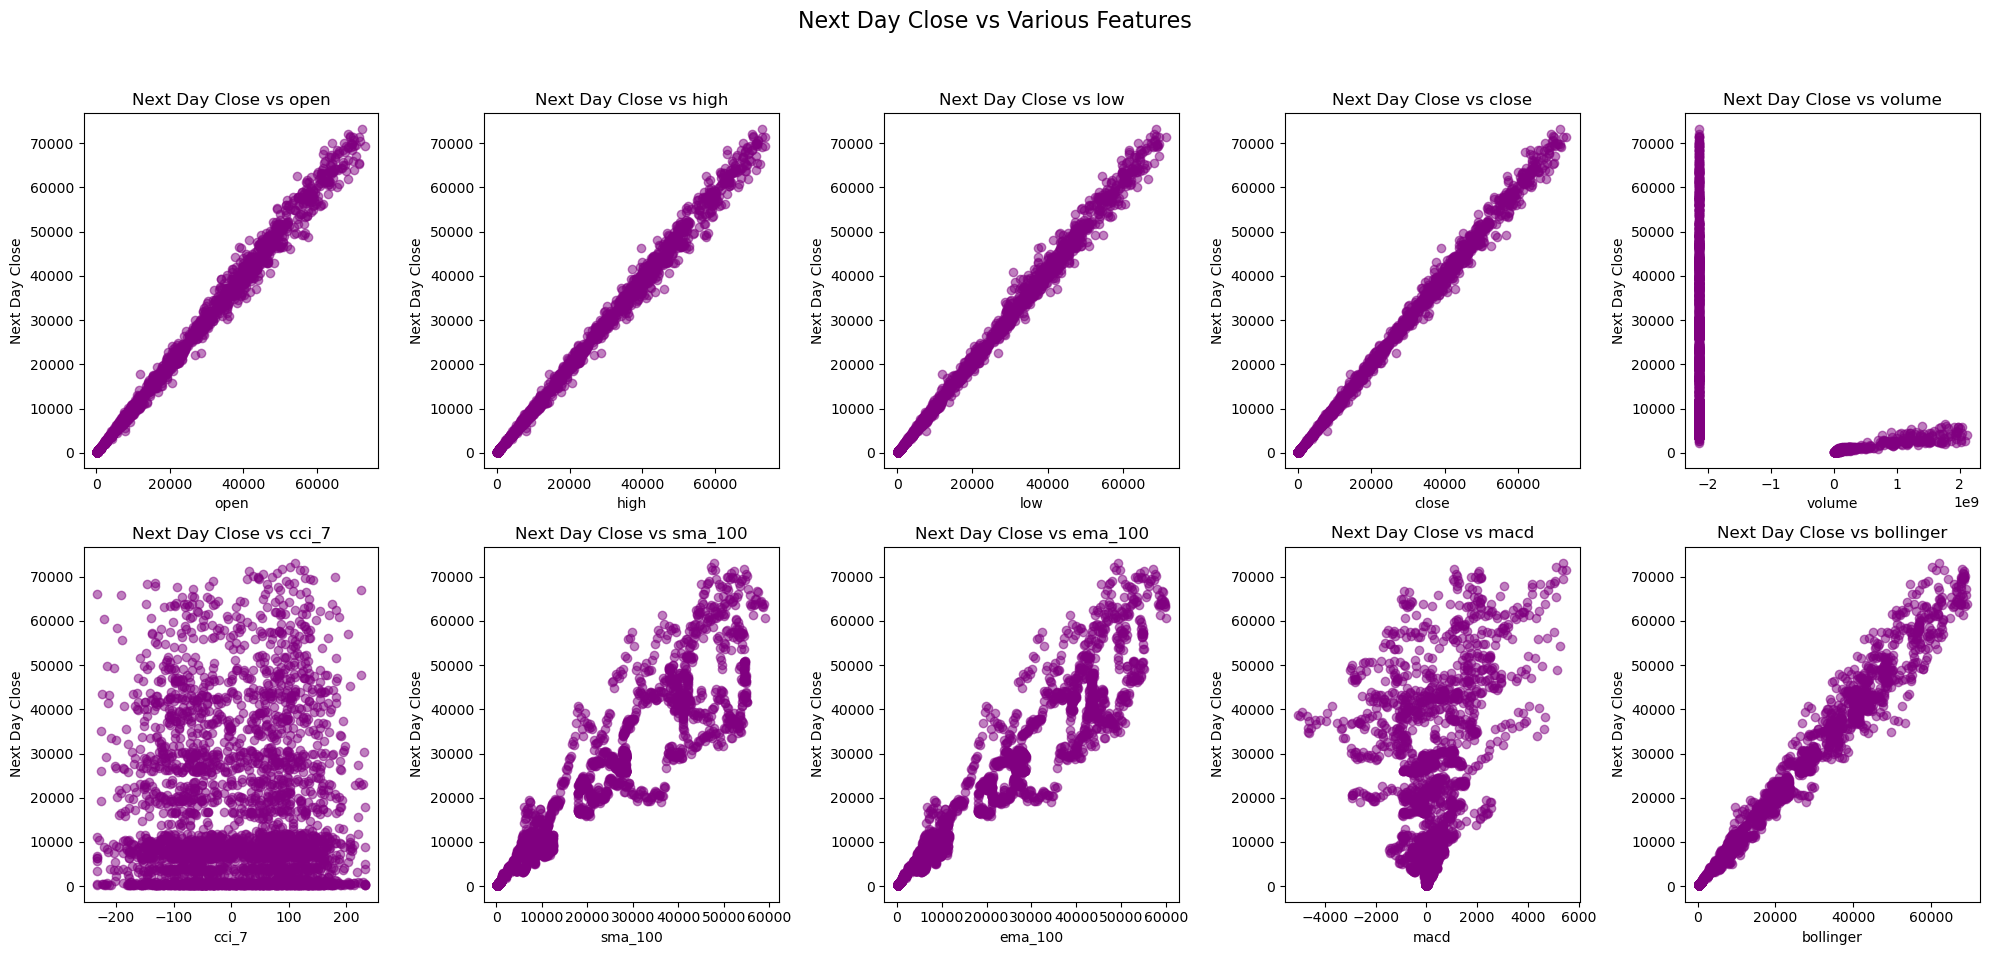

In [30]:

columns_to_plot = ['open', 'high', 'low', 'close', 'volume', 'cci_7', 
                   'sma_100', 'ema_100', 'macd', 'bollinger']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Next Day Close vs Various Features', fontsize=16)


for i, column in enumerate(columns_to_plot):
    ax = axes[i//5, i%5]
    ax.scatter(df[column], df['next_day_close'], alpha=0.5, color='purple')
    ax.set_title(f'Next Day Close vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Next Day Close')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()
